### Muth Model
* Key point:
In Muth's model, nature does not allow agents to observe the true state. Because agents can not observe this unobservable state, they behave as if theey were learning with adaptive expectations from the perspective of somebody who (incorrectly) believes the agent can observe the state.


In [1]:
# Jovanovic problem


### Jovanovic Model:
* Employer, employee match 
* True underlying quality of worker is $\theta$, firm doesn't know this
* Observes sequence of noisy output observations centered at $\theta$ $y_t$, normally distributed. 
* Unknown variance
$$
\begin{equation}
\begin{aligned}
\theta_{t+1}&=\theta_{t}=\theta\\
y_t &= \theta_t + \nu_t
\end{aligned}
\end{equation}
$$
with prior:
$$
\begin{equation}
\theta  \sim \mathcal{N}(\hat{x}_{-1}, \Sigma_0), \quad \hat{m}_{-1}, \Sigma_0 \text{ given}
\end{equation}
$$
Going back to our original system of equations:
$$
\begin{equation}
\begin{aligned} x_{t+1} & =A_0 x_t+C w_{t+1} & & n \times 1 & & w_{t+1} \sim N\left(0, I_p\right) \\ y_t & =G x_t+v_t & & m \times 1 & & v_t  \sim N(0, R) .
\end{aligned}
\end{equation}
$$

To match our equations to Jovanovic, we see that 
* $\theta = x$
* $\mathbb{E}[\theta\mid y^{t-1}] = m_{t}$
* $A=1$ 
* $C=0$ 
* $G=1$ 
* $R=\mathrm{Var}(\nu_t)$
* $\Sigma_0 = \Sigma_0$
* $\hat{x}_{-1}=\hat{m}_{-1}$

Going back to our general Kalman filter rule:
$$
\begin{equation}
\begin{aligned}
a_t &= y_t -  G \hat{x_t}\\
K_t &= A\Sigma_t G' (G \Sigma_t G' + R)^{-1}\\
\hat{x_{t+1}} &= A\hat{x}_t + K_t a_t\\
\Sigma_{t+1} &= (A-K_t G)\Sigma_t (A-K_t G)' +CC' + KRK'\\
x_0 &\sim \mathcal{N}(\hat{x}_0, \Sigma_0 )
\end{aligned}
\end{equation}
$$
Notice our predicted $y_{t+1}\mid y^{t}$ best forecast is given simply by $G\hat{x}_{t+1}$ which implies that since our estimated $x_{t+1}$ is given by the normal distribution: 
$$
x_{t+1} \mid y^{t} \sim \mathcal{N}(\hat{x}_{t+1},\Sigma_{t+1})
$$
we have
$$
\hat{y}_{t+1} \mid y^{t} \sim \mathcal{N}(G\hat{x}_{t+1}, G\Sigma_{t+1}G'+R)
$$





So now applying the Jovanovic model, we get the following simplified set of equations for our Kalman filter equations
$$
\begin{equation}
\begin{aligned} a_t & =y_t-m_{t-1} \\ K_t & =\frac{\Sigma_t}{\Sigma_t+R} \\ m_t & =m_{t-1}+K_t a_t \\ \Sigma_{t+1} & =\frac{\Sigma_t R}{\Sigma_t+R}\end{aligned}
\end{equation}
$$
We simplify by substituting in for $a$ in the law of motion  for $m$ and rewriting our evolution equation for $\Sigma$ to get:
$$
\begin{equation}
\begin{aligned}
m_{t} &= (1-K_t)m_{t-1} + K_t y_t\\
K_t &= \frac{\Sigma_t}{\Sigma_t+R}\\
\frac{1}{\Sigma_{t+1}} &= \frac{1}{R}+\frac{1}{\Sigma_t}
\end{aligned}
\end{equation}
$$
$\Sigma_{t}^{-1}$ is the precision, and we can see $\Sigma_{t}^{-1} \to \infty$, $\Sigma \to 0$   so we eventually converge to the correct value $\theta$.
We also see that $K_t$ is declining to $0$ as well.
Finally, since $G=1$ here, we can see that:
$$
\begin{equation}
\begin{aligned}
\hat{x}_{t+1}\mid y^{t} &\sim \mathcal{N}(m_{t+1}, \Sigma_{t+1})\\
\hat{y}_{t+1} \mid y^{t} &\sim \mathcal{N}(m_{t+1}, \Sigma_{t+1}+R)
\end{aligned}
\end{equation}
$$


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
plt.rc('text.latex', preamble=r'\usepackage{amsmath}'
          r'\usepackage{helvet}'
           r'\usepackage{sansmath}'
       r'\sansmath')
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = 'helvetica'

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [4]:
# True Values of system
θ_true = 10.0
A = 1
C = 0
G = 1
R = 4.0
sd_y = np.sqrt(R)

# Generates rng
rng = np.random.default_rng(seed = 2020)

# Draw from normal for 100 periods, mean 0 variance 0.25, 
ν_vec = rng.normal(loc = 0.0 , scale = sd_y, size = [100,])
ys_array  = θ_true + ν_vec

# Plot y realizations
ys = pd.DataFrame({"Observations": ys_array, "Time": range(len(ys_array))})
ys.set_index("Time")

,Observations
Time,
0,12.520413
1,10.446357
2,12.665097
3,7.163591
4,9.454406
...,...
95,10.908316
96,8.475444
97,10.062913


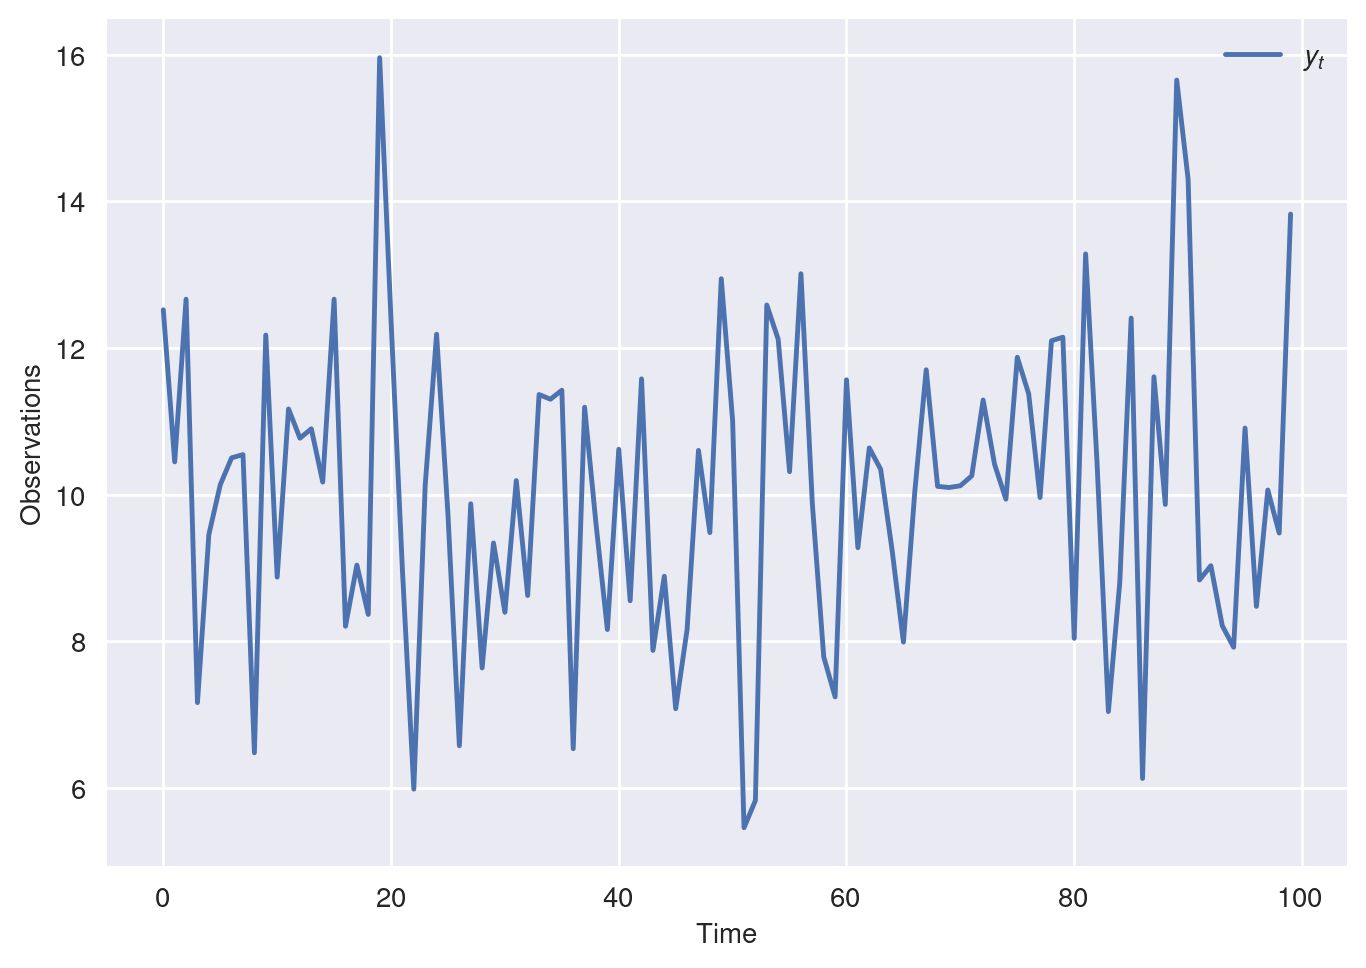

In [5]:
fig = sns.lineplot(data=ys, x=ys["Time"], y=ys["Observations"], label=r"$y_t$")
fig.plot();

In [6]:
# Prior
m_prior = 8.0
Σ_0 = 8.0
from course.kalman_filter import KalmanFilter

In [7]:
kf=KalmanFilter(A, C, G, R, X=m_prior, Σ=Σ_0)

In [8]:
kf.__dict__

{'A': array([[1]]),
 'C': array([[0]]),
 'G': array([[1]]),
 'R': array([[4.]]),
 'Σ': array([[8.]]),
 'X': array([[8.]]),
 'Σ_prior': array([[8.]]),
 'X_prior': array([[8.]]),
 'a': array([[0]]),
 'K': array([[1]]),
 'y': array([[0]]),
 'X_prime': array([[0]]),
 'Σ_prime': array([[0]]),
 'obs': [],
 'Xs': [array([[8.]])],
 'Σs': [array([[8.]])],
 'Ks': [],
 'resids': [],
 'F': array([[0]]),
 't': 0,
 'num_states': 1}

In [9]:
# One update
kf.update(ys_array[0])
stacked_kalman = np.concatenate(kf.get_Ks())
stacked_states = np.concatenate(kf.get_Xs())
stacked_vars = np.concatenate(kf.get_Σs())
stacked_errs = np.concatenate(kf.get_resids())
one_step={"Kalman": stacked_kalman, "xs": stacked_states, "Vars": stacked_vars, "Residuals": stacked_errs}
print(one_step)

{'Kalman': array([[0.66666667]]), 'xs': array([[ 8.        ],
       [11.01360881]]), 'Vars': array([[8.        ],
       [2.66666667]]), 'Residuals': array([[4.52041322]])}


In [10]:
# Forecast
#fig =plt.figure("Forecast")
# Forecast 10 periods ahead
#forecast_mean, forecast_var = kf.forecast(2)
#perc = np.zeros((len(forecast_mean),2))
# compute 5th and 95th percentiles
#for i in range(len(forecast_mean)):
#    perc[i] = stats.norm.ppf((0.05,0.95),loc=forecast_mean[i], scale = np.sqrt(forecast_var[i]))
#forecast_mean_stacked = np.concatenate(forecast_mean)
#plt.plot(forecast_mean_stacked, label="Predicted mean")
#plt.fill_between(range(len(perc[:,0])),perc[:,0],perc[:,1], alpha=0.3)
#plt.title("Prediction, h periods ahead")
#plt.xlabel("Periods")
#plt.ylabel(r"$\hat{y}_t$")
#plt.show()

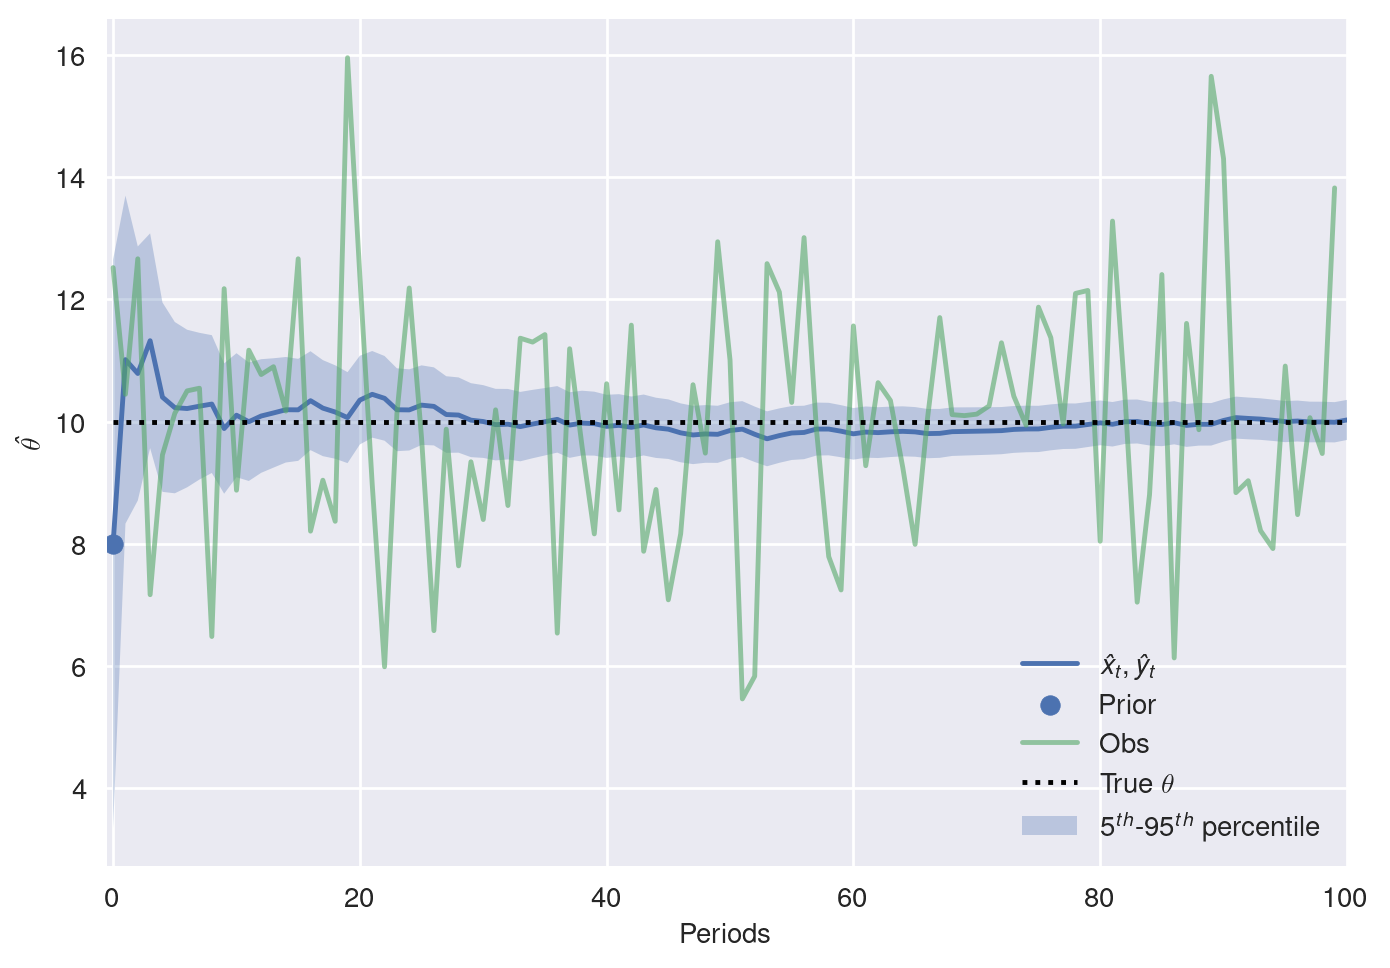

In [11]:
# Reset Kalman filter
kf.reset()

time_period = len(ys_array)
filtered_state= np.zeros(time_period)

for t in range(0,time_period):
    kf.update(ys_array[t])
    filtered_state[t]= kf.X

stacked_kalman = np.concatenate(kf.get_Ks())
stacked_states = np.concatenate(kf.get_Xs())
stacked_vars = np.concatenate(kf.get_Σs())
stacked_errs = np.concatenate(kf.get_resids())
perc_state = np.zeros((time_period+1,2))
# compute 5th and 95th percentiles for 0th and 1st entry
for i in range(time_period+1):
    perc_state[i] = stats.norm.ppf((0.05,0.95),loc=stacked_states[i], scale = np.sqrt(stacked_vars[i]))
    
plt.plot(stacked_states, label=r"$\hat{x}_t,\hat{y}_t$")
plt.scatter(x=0,y=stacked_states[0], color='C0', label="Prior")
plt.plot(ys_array, label="Obs", alpha = 0.6)

plt.xlabel("Periods")
plt.ylabel(r"$\hat{\theta}$")
plt.hlines(y=θ_true, xmin=0, xmax=(time_period), label=r"True $\theta$", color="black", linestyles='dotted')
plt.fill_between(range(0,len(stacked_states)),perc_state[:,0],perc_state[:,1], alpha=0.3, label=r"$5^{th}$-$95^{th}$ percentile")
plt.legend(loc="lower right")
plt.xlim([-0.5,len(stacked_states)-1])
plt.show()

#print(kf.__dict__)

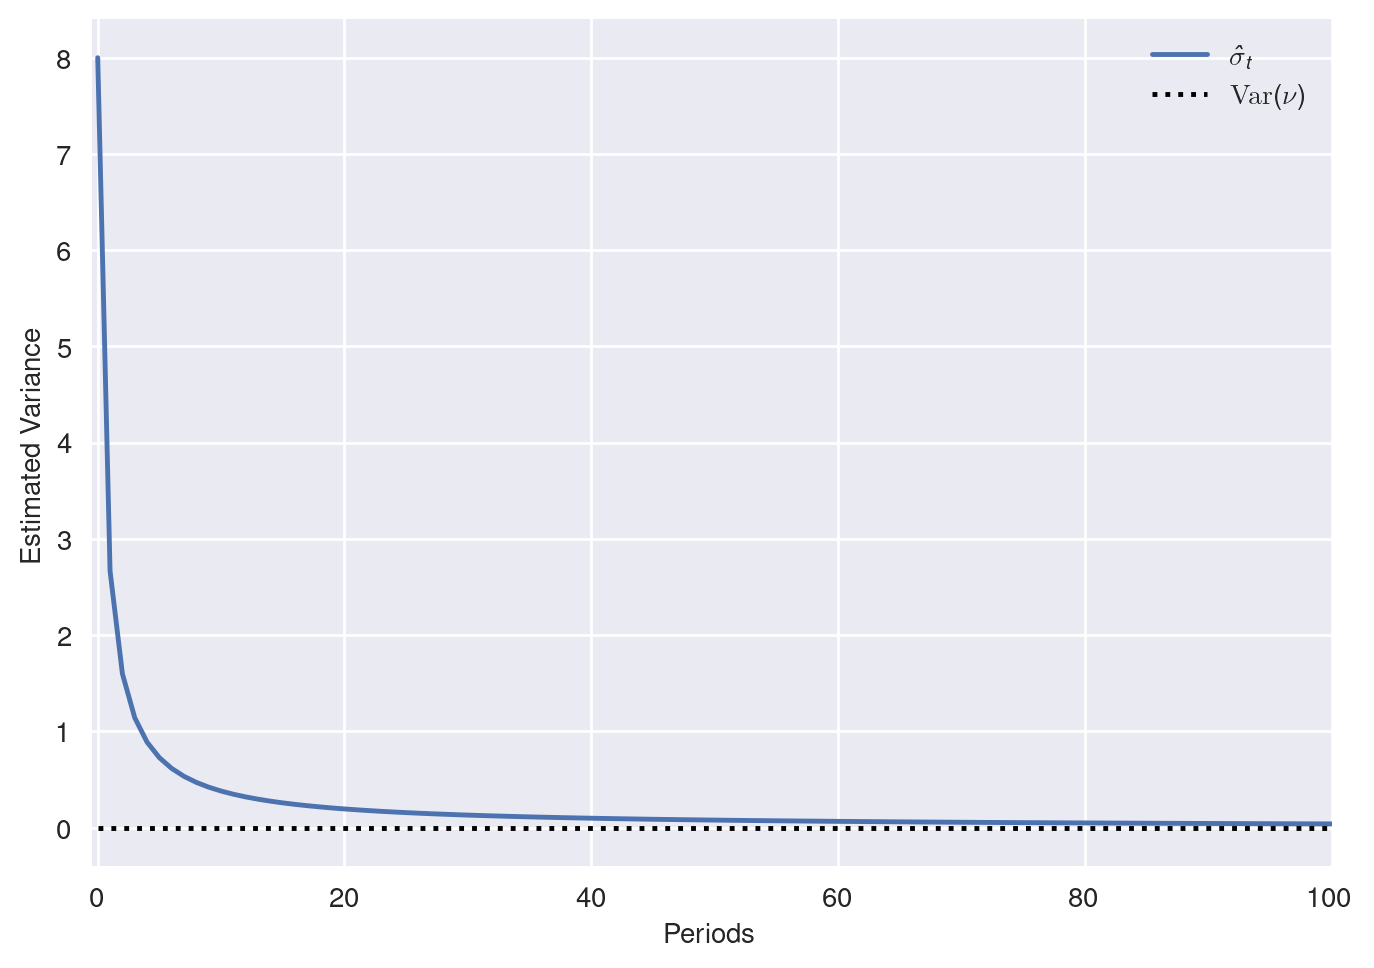

In [27]:
# posterior variance
plt.plot(stacked_vars, label=r"$\hat{\sigma}_t$")
plt.xlabel("Periods")
plt.ylabel("Estimated Variance")
plt.xlim([-0.5,len(stacked_states)-1])
plt.plot([0, time_period], [0, 0], label=r"$\textrm{Var}(\nu)$", color="black", linestyle="dotted")
plt.legend()
plt.show()